In [1]:
import os, sys
path_to_package = os.path.abspath(os.path.join('../../..'))
if path_to_package not in sys.path:
    sys.path.append(path_to_package)


from src.io import get_filepaths, read_phylip_file
from src.models import data_preparation
from src.utils import get_filename

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns

In [2]:
chromosome = "all"

original_fps = get_filepaths('/home/khaldrem/code/sc_regmod/dataset/original')
clean_fps = get_filepaths('/home/khaldrem/code/sc_regmod/dataset/clean')
anova_fps_exp_1 = get_filepaths(f"/home/khaldrem/code/sc_regmod/dataset/anova/anova_at_least_one_phenotype/p_value_0_01/{chromosome}")

In [3]:
print(f"Cantidad de archivos proceso 2 - exp 1: {len(anova_fps_exp_1)}")

Cantidad de archivos proceso 2 - exp 1: 5960


In [4]:
df_files = {}

filenames = []
original_length = []
clean_length = []
anova_length = []

for f in original_fps:
    data = read_phylip_file(f)
    filename = get_filename(f)

    filenames.append(filename)
    original_length.append(data.get_alignment_length())

    clean_path = f"/home/khaldrem/code/sc_regmod/dataset/clean/{filename}.phylip"
    if os.path.exists(clean_path):
        data2 = read_phylip_file(clean_path)
        clean_length.append(data2.get_alignment_length())
    else:
        clean_length.append(-1)

    anova_path = f"/home/khaldrem/code/sc_regmod/dataset/anova/anova_at_least_one_phenotype/p_value_0_01/{chromosome}/{filename}.phylip"
    if os.path.exists(anova_path):
        data3 = read_phylip_file(anova_path)
        anova_length.append(data3.get_alignment_length())
    else:
        anova_length.append(-1)


df_files["filenames"] = filenames
df_files["Original"] = original_length
df_files["Proceso_1"] = clean_length
df_files["Proceso_2"] = anova_length

df_len = pd.DataFrame.from_dict(df_files)

In [5]:
df_len.head()

,filenames,Original,Proceso_1,Proceso_2
0,YNR029C,1290,161,54
1,YOR059C,1353,176,57
2,YJR062C,1375,194,73
3,YJL123C,1565,363,137
4,YJL203W,843,122,36


In [6]:
df_len.loc[df_len['Proceso_2']!= -1, 'percentage'] = 1 - (df_len["Proceso_2"]/df_len["Proceso_1"])

In [7]:
print(f"Cantidad de archivos que presentaron un 50% o mas de: {df_len.loc[(df_len['Proceso_2'] != -1) & (df_len['percentage'] >= 0.5)].shape[0]}")

Cantidad de archivos que presentaron un 50% o mas de: 5885


In [9]:
print(f"Cantida de archivos que fueron eliminados: {df_len.loc[(df_len['Proceso_2'] == -1)].shape[0]} (Respecto a la cantidad original)")

Cantida de archivos que fueron eliminados: 55 (Respecto a la cantidad original)


In [12]:
print("Nombres: ")
df_len.loc[(df_len['Proceso_2'] == -1) & (df_len['Proceso_1'] != -1)]["filenames"].tolist()

Nombres: 


['YHL049C',
 'YHR054C',
 'YFL061W',
 'YAR066W',
 'YPL281C',
 'YJL222W',
 'YLL066C',
 'YCL066W',
 'YLR463C',
 'YDL247W',
 'YFL066C',
 'YFL064C',
 'YBL112C',
 'YLR161W',
 'YJR159W',
 'YFL065C',
 'YPR204W']

In [11]:
print("Datos proceso 2: ")
print(f"mean: {df_len['Proceso_2'].mean()}")
print(f"std: {df_len['Proceso_2'].std()}")
print(f"var: {df_len['Proceso_2'].var()}")
print()

Datos proceso 2: 
mean: 66.02011637572735
std: 77.12561994175361
var: 5948.361251399823



In [14]:
df_len.describe()

,Original,Proceso_1,Proceso_2,percentage
count,6015.000000,6015.000000,6015.000000,5960.000000
mean,1468.670158,220.279468,66.020116,0.701451
std,1132.129197,264.945442,77.125620,0.072695
min,78.000000,-1.000000,-1.000000,0.100000
25%,690.000000,93.000000,26.000000,0.664100
50%,1182.000000,159.000000,47.000000,0.705417
75%,1877.000000,270.000000,81.000000,0.744465
max,14737.000000,6609.000000,1612.000000,0.988095


In [15]:
df_len.head()

,filenames,Original,Proceso_1,Proceso_2,percentage
0,YNR029C,1290,161,54,0.664596
1,YOR059C,1353,176,57,0.676136
2,YJR062C,1375,194,73,0.623711
3,YJL123C,1565,363,137,0.622590
4,YJL203W,843,122,36,0.704918


Text(0.5, 0, 'Proceso 2')

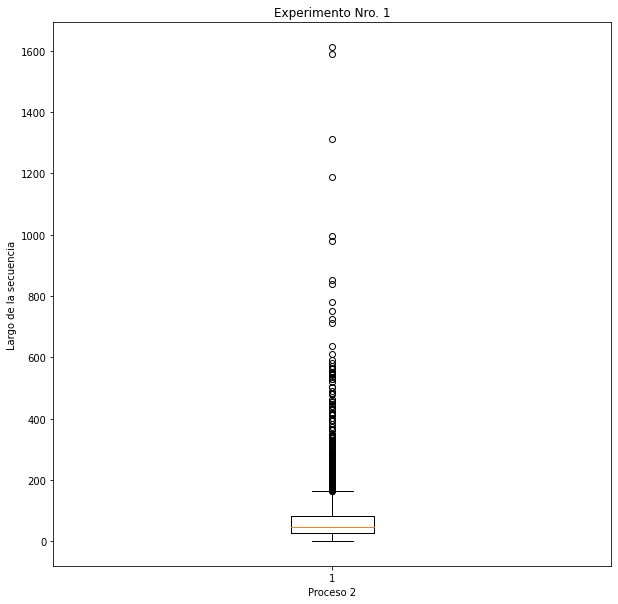

In [21]:
plt.figure(figsize=(10, 10))
proc2 = df_len.loc[df_len["Proceso_2"] != -1]

plt.boxplot(proc2["Proceso_2"])
plt.title("Experimento Nro. 1")
plt.ylabel("Largo de la secuencia")
plt.xlabel("Proceso 2")